Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Accuracy: 0.866

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



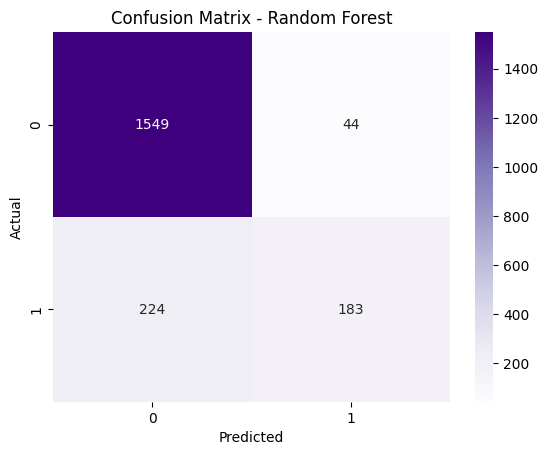

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\chaha\Downloads\archive (4)\Churn_Modelling.csv")

# Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Feature and Target Split
X = data.drop('Exited', axis=1)
y = data['Exited']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Randomized Search CV for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = RandomizedSearchCV(rf, param_grid, scoring='f1', n_iter=10, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# Best Estimator
best_rf = rf_grid.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()
